#       __Green Skills AI Workshop Final Project__
- Aditya Joshi        22070521016
- Anvesh Khode        22070521021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path =  './MYDATASET.xlsx'

data = pd.ExcelFile(file_path)
data.sheet_names


['Note on Sources',
 'UN reporting',
 'UN reporting source note',
 'ea_total_rate_deficit',
 'ea_urban_rate_deficit',
 'ea_rural_rate_deficit',
 'ea_total_rate_deficit-REFERENCE']

In [3]:
# UN Reporting Sheet Analysis
un_reporting_data = data.parse('UN reporting')


In [4]:
# Feature Selection
cleaned_data_1 = un_reporting_data.drop(columns=[ 'Reporting Type', 'SeriesCode', 'SeriesID', 'Indicator', 'Units', 'GeoAreaName/Reference Area Name', 'GeoAreaName/Reference Area Name', 'Ref_Area_Type', 'SeriesName', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'FootNote', 'ISOalpha3', 'Source'])
cleaned_data_1.columns = cleaned_data_1.columns.str.strip()
cleaned_data_1 = cleaned_data_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

cleaned_data_1.head()

C:\Users\Anvesh\AppData\Local\Temp\ipykernel_17608\126693859.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data_1 = cleaned_data_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [5]:
cleaned_data_1.isnull().sum()

GeoAreaCode/Reference Area Code      0
TimePeriod                           0
Value                                0
Nature                             562
Location                             0
Type                                 0
dtype: int64

In [6]:
# Filling Missing Values

# Nature column, replace NA values with its own label
cleaned_data_1['Nature'].fillna('NA', inplace = True)
cleaned_data_1['Nature'].replace('NA ', 'NA', inplace = True)
# Excluding rows with nature == NA
cleaned_data_1 = cleaned_data_1[cleaned_data_1['Nature'] != 'NA']

# Replace 'NaN' values with median
cleaned_data_1['Value'].replace('NaN', cleaned_data_1['Value'].median())

cleaned_data_1.head()

C:\Users\Anvesh\AppData\Local\Temp\ipykernel_17608\2725335085.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data_1['Nature'].fillna('NA', inplace = True)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


# Functions

In [7]:
def unique_entries(sheet):
    print("Unique entries per field:\n")
    for field in sheet.columns:
        unique_count = len(sheet[field].unique())
        print(f"{field:<35} : {unique_count}")


In [8]:
def encode_multiple(sheet, columns):
    label_encoders = {}

    for col in columns:
        le = LabelEncoder()
        sheet[col] = le.fit_transform(sheet[col])
        label_encoders[col] = le
    return label_encoders

# Quick Check

In [9]:
cleaned_data_1.isnull().sum()

GeoAreaCode/Reference Area Code    0
TimePeriod                         0
Value                              0
Nature                             0
Location                           0
Type                               0
dtype: int64

In [10]:
unique_entries(cleaned_data_1)

Unique entries per field:

GeoAreaCode/Reference Area Code     : 320
TimePeriod                          : 23
Value                               : 1163
Nature                              : 4
Location                            : 3
Type                                : 2


In [11]:
# Label Encode the Data

label_encoders = encode_multiple(cleaned_data_1, ['Location', 'Type', 'Nature', 'TimePeriod', 'GeoAreaCode/Reference Area Code'])
cleaned_data_1.head()


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,257,0,37.7,1,0,1
1,257,1,38,1,0,1
2,257,2,39,1,0,1
3,257,3,40.9,1,0,1
4,257,4,40.7,1,0,1


In [12]:
label_encoders

{'Location': LabelEncoder(),
 'Type': LabelEncoder(),
 'Nature': LabelEncoder(),
 'TimePeriod': LabelEncoder()}

# EDA

C:\Users\Anvesh\AppData\Local\Temp\ipykernel_17608\3739245539.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


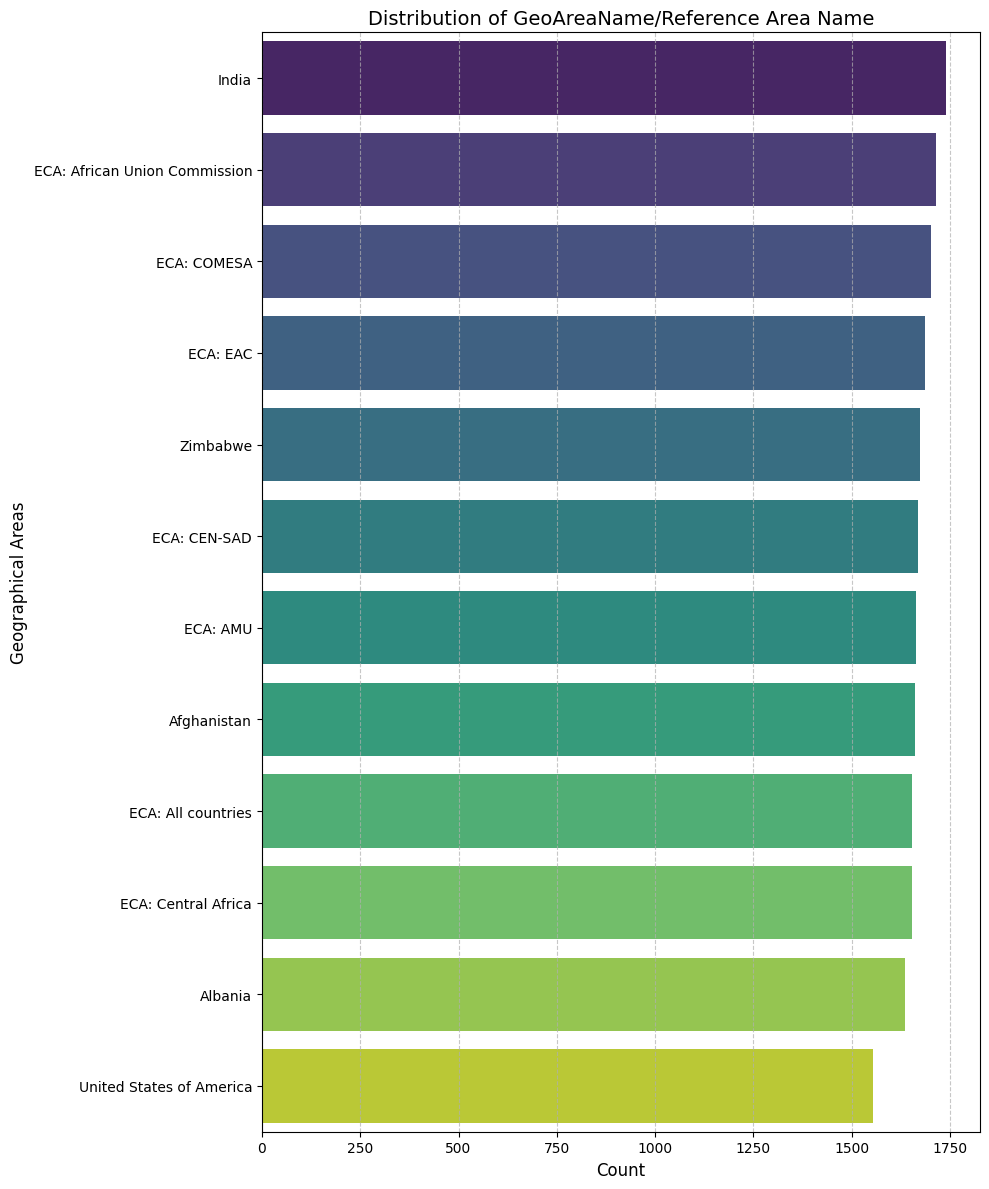

In [23]:
# Graph 1

np.random.seed(42)
categories = np.array(['ECA: African Union Commission', 'ECA: All countries', 
                       'ECA: AMU', 'ECA: CEN-SAD', 'ECA: Central Africa', 'ECA: COMESA',
                       'ECA: EAC', 'Afghanistan', 'Albania', 'India', 'United States of America', 
                       'Zimbabwe'])  # Use a subset of categories for clarity
n_data_points = 20000
geo_area_names = np.random.choice(categories, n_data_points)
graph_data = pd.DataFrame({'GeoAreaName/Reference Area Name': geo_area_names})

# Count the occurrences of each category
counts = graph_data['GeoAreaName/Reference Area Name'].value_counts()

# Sort by counts for better visualization
counts = counts.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(
    x=counts.values,
    y=counts.index,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Geographical Areas', fontsize=12)
plt.title('Distribution of GeoAreaName/Reference Area Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


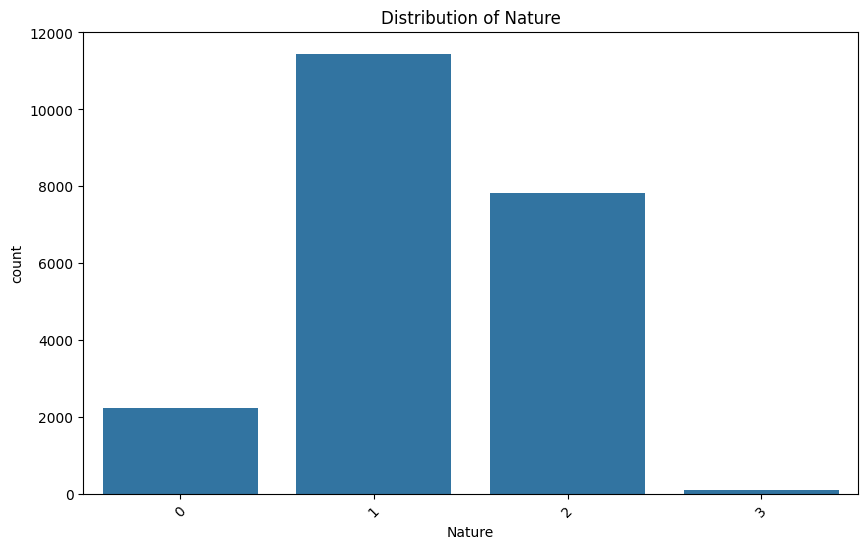

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data_1, x='Nature')
plt.title('Distribution of Nature')
plt.xticks(rotation=45)
plt.show()


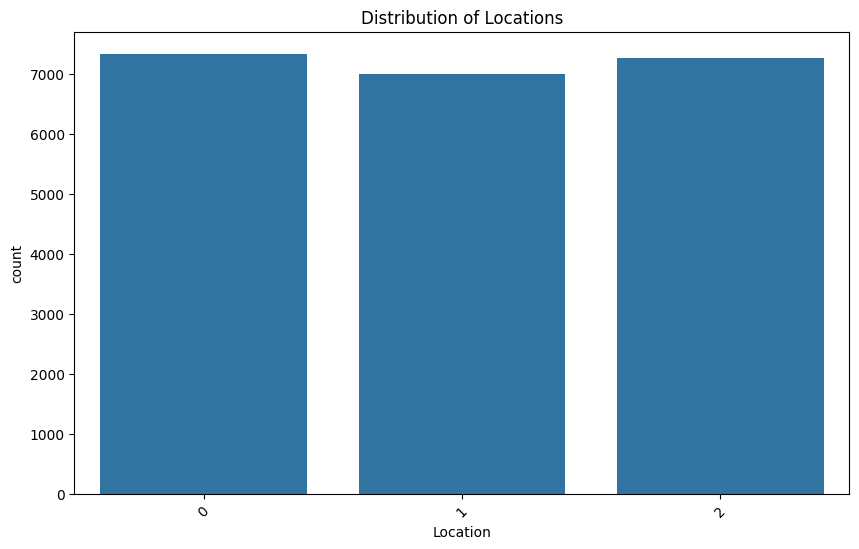

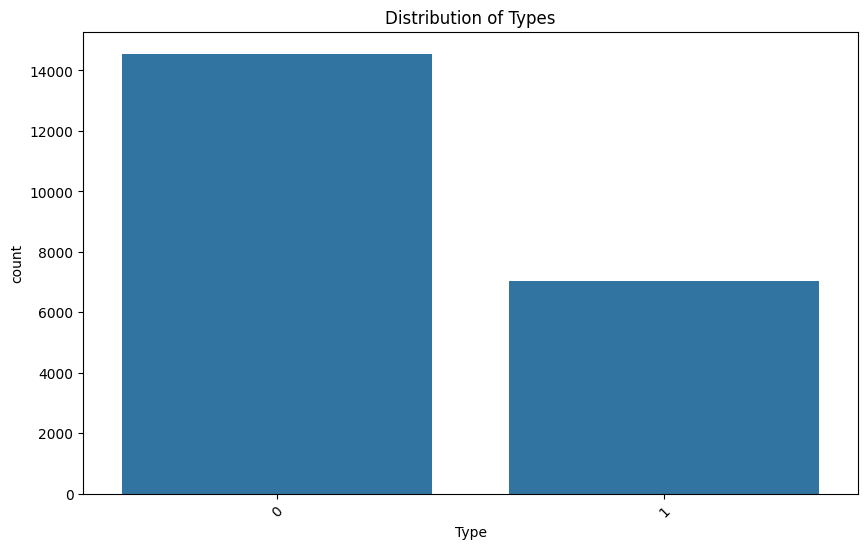

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data_1, x='Location')
plt.title('Distribution of Locations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data_1, x='Type')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()


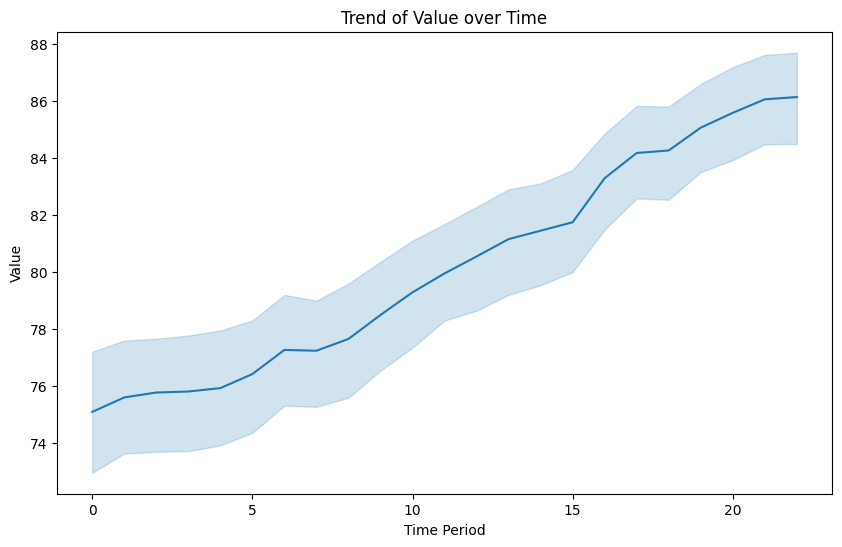

In [16]:
# Assuming TimePeriod is numeric or can be converted to a time format
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data_1, x='TimePeriod', y='Value')
plt.title('Trend of Value over Time')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.show()

EDA 2.0

In [20]:
ea_total_rate_deficit = data.parse('ea_total_rate_deficit', usecols=list(range(49)))
ea_total_rate_deficit


,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afghanistan,Central Asia and Southern Asia,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,6.045929e+06
1,Albania,Northern America and Europe,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Algeria,Western Asia and Northern Africa,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,7.095159e+04
3,American Samoa,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Andorra,Northern America and Europe,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Western Asia and Northern Africa,NaN,88.073284,88.650167,88.580416,89.260560,89.133464,89.697461,91.420104,89.862460,...,3.231626e+07,3.501580e+07,3.479727e+07,3.347274e+07,2.949568e+07,3.627430e+07,3.154637e+07,3.081990e+07,3.024835e+07,2.988148e+07
225,Sub-Saharan Africa,NaN,25.798302,26.012223,27.219305,29.540140,29.311852,29.274155,31.168640,32.533935,...,5.728383e+08,5.860097e+08,5.947437e+08,5.639254e+08,5.804772e+08,5.677724e+08,5.749707e+08,5.756052e+08,5.666395e+08,5.712388e+08
226,Oceania,NaN,81.595715,81.466043,81.369678,81.243673,81.109301,81.017766,80.398437,80.840325,...,7.429488e+06,7.494825e+06,7.602015e+06,8.186205e+06,7.800237e+06,8.208796e+06,7.681359e+06,8.099672e+06,8.236045e+06,8.547971e+06
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cleaned_data_2 = ea_total_rate_deficit

unique_entries(ea_total_rate_deficit)

Unique entries per field:

Albania                             : 227
Northern America and Europe         : 8
99.43085479736328                   : 158
99.42198944091797                   : 160
99.40457916259766                   : 158
99.38562774658203                   : 165
99.37213897705078                   : 165
99.37112426757812                   : 165
99.38936614990234                   : 158
99.42845153808594                   : 156
100                                 : 155
99.55445098876953                   : 153
99.64420318603516                   : 152
99.71864318847656                   : 151
99.9                                : 146
99.89031219482422                   : 148
99.95                               : 139
99.98                               : 136
99.89                               : 133
99.89.1                             : 123
100.1                               : 124
100.2                               : 117
100.3                               : 114
100.4    